In [1]:
import cv2
import numpy as np
import scipy as sp
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
#% matplotlib notebook
% matplotlib inline

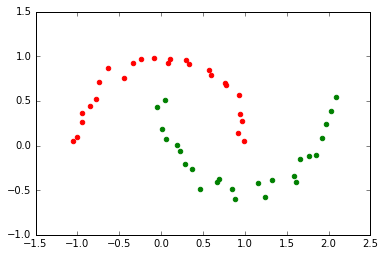

In [67]:
data = np.loadtxt('moonclusterdata.txt', delimiter=',')
classes = np.loadtxt('moonclusterclasses.txt', delimiter=',')

nclusters = 2
color = ['r','g','b']
for s in range(nclusters):
    plt.scatter(data[(classes == s),0],data[(classes == s),1],marker='o', color=color[s])

In [75]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=100, gamma=1.0).fit(data,classes)
sv = svm.support_vectors_
print(sv)
print(svm.dual_coef_.ravel()>0)

[[-0.44433298  0.75834167]
 [ 0.0802388   0.9289987 ]
 [-1.0042344   0.09480691]
 [ 0.98737662  0.05199234]
 [ 1.16127406 -0.41996182]
 [ 0.69278882 -0.37049078]
 [ 1.65456888 -0.15650283]
 [ 0.04055801  0.51438973]
 [ 2.08780535  0.548649  ]]
[False False False False  True  True  True  True  True]


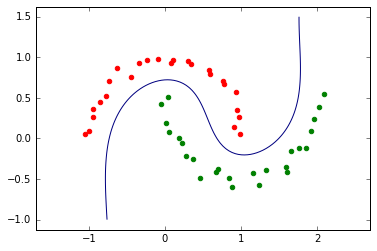

In [84]:

X1, X2 = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1.0, 1.5, 100))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = svm.decision_function(X_grid)
fill_levels = [decision_values.min()] + [0] + [
            decision_values.max()]

for s in range(nclusters):
    plt.scatter(data[(classes == s),0],data[(classes == s),1],marker='o', color=color[s])
ax = plt.gca()
ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=[0])
#ax.contourf(X1, X2, decision_values.reshape(X1.shape), cmap='bone', levels=fill_levels)
#ax.scatter(sv[0,:],sv[1,:], marker='^', color='b', s=100)


In [32]:
#print(xx)
# print(X1)
# print(X2)
# print(X1.ravel())
# print(X2.ravel())
# print(X_grid)